In [1]:
#including 2
import os
import glob
import sys
env_path = os.path.join(os.path.dirname('./'), '..')
print(env_path)
if env_path not in sys.path:
    sys.path.append(env_path)
import argparse
import os

import cv2
import torch
import numpy as np
from tqdm import tqdm

#load imgs and bboxes
def load_sequece_lasot(root_path):
    img_list = (glob.glob(root_path + '/img/*.jpg'))
    img_list.sort()
    gt_path = glob.glob(root_path + '/groundtruth.txt')

    with open(gt_path[0], 'r') as f:
        gt_bboxes = f.readlines()
    if '\t' in gt_bboxes[0]:
        spl = '\t'
    else:
        spl = ','
    gt_bboxes = np.array([list(map(int,gt_bbox.strip('\n').split(spl))) for gt_bbox in gt_bboxes]).astype(int)
    return img_list, gt_bboxes

./..


In [2]:
#load sequence
sequences_path_tem = '/data/runqing/datasets/LaSOTtest/*'
sequences_path = '/data/runqing/datasets/LaSOTtest/'
sequences_name = glob.glob(sequences_path_tem)
sequences_name.sort()
print(len(sequences_name))

output_base_path = './lasottest_result/'

seq = sequences_name[0]

seq_name = seq.split('/')[-1]

280


In [3]:
#问题帧搜索区域框
import math
def cal_sr(last_bbox):

    w_x = last_bbox[2] + (4 - 1) * ((last_bbox[2] + last_bbox[3]) * 0.5)
    h_x = last_bbox[2] + (4 - 1) * ((last_bbox[2] + last_bbox[3]) * 0.5)
    s_x = math.ceil(math.sqrt(w_x * h_x))
    sr_bbox = [last_bbox[0],last_bbox[1],s_x,s_x]

    #print(sr_bbox)

    trans_sr_bbox = [sr_bbox[0] - sr_bbox[2] / 2,
                    sr_bbox[1] - sr_bbox[3] / 2,
                    s_x,
                    s_x]

    return trans_sr_bbox

In [4]:
#定位到问题序列
#计划问题序列：basketball-6(6)\basketball-11(5)\bear-17(8)\bicycle-2(13)\bird-2(18)\bird-15(16)\
#bottle-14(30)\bottle-18(31)\bus-19(33)\cat-20(42)\cattle-2(46)\cup-1(64)
seq = sequences_name[64]

seq_name = seq.split('/')[-1]
print(seq)
results = []
img_list,gt = load_sequece_lasot(seq)
init_box = gt[0]


/data/runqing/datasets/LaSOTtest/cup-1


In [5]:
#问题序列
problem_seq = [6,5,8,13,18,16,30,31,33,42,46,64]

In [6]:
#问题序列
problem_seq = [42,46,64]

In [10]:
#绘制搜索区域框函数
def plot_rect_sr(trans_sr_bbox,color):
    leftupcorn = [trans_sr_bbox[0],trans_sr_bbox[1]]
    rect_sr=patches.Rectangle(leftupcorn,trans_sr_bbox[2],trans_sr_bbox[3],linewidth=1,edgecolor='black',facecolor=color,alpha = 0.4)
    return rect_sr


In [11]:
#绘图程序完整
for sq in problem_seq:
    #读取问题序列信息
    seq = sequences_name[sq]

    seq_name = seq.split('/')[-1]
    #print(sq),print(seq)
    results = []
    img_list,gt = load_sequece_lasot(seq)
    init_box = gt[0]

    #读取transt_res和M_CoTransT_res
    T_res_path = './TransT_res/'
    M_res_path = './M-CoTransT_res/'

    seq_T_res = T_res_path + seq_name + '.txt'
    seq_M_res = M_res_path + seq_name + '.txt'

    T_res = np.loadtxt(seq_T_res,delimiter=',')
    M_res = np.loadtxt(seq_M_res,delimiter=',')

    #计算帧长
    seq_len = len(img_list)
    for f in tqdm(range(seq_len)):
        #计算搜索区域
        T_res_f = T_res[f-1]
        M_res_f = M_res[f-1]

        sr_T = cal_sr(T_res_f)
        sr_M = cal_sr(M_res_f)

        #读取图片
        img=matplotlib.image.imread(img_list[f])
        #print(img_list[f])
        fig = plt.figure(figsize=(img.shape[1]/100, img.shape[0]/100), dpi=100)
        plt.imshow(img)
        currentAxis=plt.gca()

        #绘制帧码
        frame_label = '#' + str(f+1)
        currentAxis.text(10, 30, frame_label, fontsize=30, color="yellow", style="italic", weight="black",
                        verticalalignment='center',
                        bbox=dict(facecolor=None, alpha=0.0))

        #绘制搜索区域
        rect_sr_T = plot_rect_sr(sr_T,'blue')
        rect_sr_M = plot_rect_sr(sr_M,'green')
        currentAxis.add_patch(rect_sr_T)
        currentAxis.add_patch(rect_sr_M)

        #绘制gt bbox
        draw_gt = gt[f]
        trans_draw_gt = draw_gt.copy()
        xc = draw_gt[0] - draw_gt[2] / 2
        yc = draw_gt[1] - draw_gt[3] / 2
        trans_draw_gt[0] = xc
        trans_draw_gt[1] = yc
        #print(trans_draw_gt)
        leftupcorn = [draw_gt[0],draw_gt[1]]
        rect_gt=patches.Rectangle(leftupcorn,trans_draw_gt[2],
                                  trans_draw_gt[3],linewidth=5,
                                  edgecolor='lime',facecolor='none')
        currentAxis.add_patch(rect_gt)

        out_path = './srview/' + seq_name + '/'

        if not os.path.exists(out_path):
            os.mkdir(out_path)

        f_out_path = out_path + str(f).zfill(8) + '.png'    
        fig.savefig(f_out_path, dpi=100)
        plt.close()
    print(seq_name + 'finished!')

100%|██████████| 1261/1261 [07:44<00:00,  2.72it/s]


cat-20finished!


100%|██████████| 2461/2461 [05:19<00:00,  7.69it/s]


cattle-2finished!


100%|██████████| 1433/1433 [08:54<00:00,  2.68it/s]

cup-1finished!


In [8]:
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt


In [66]:
#读取问题序列信息
seq = sequences_name[6]

seq_name = seq.split('/')[-1]
print(seq)
results = []
img_list,gt = load_sequece_lasot(seq)
init_box = gt[0]


/data/runqing/datasets/LaSOTtest/basketball-6


In [76]:
#读取transt_res和M_CoTransT_res
T_res_path = './TransT_res/'
M_res_path = './M-CoTransT_res/'

seq_T_res = T_res_path + seq_name + '.txt'
seq_M_res = M_res_path + seq_name + '.txt'

T_res = np.loadtxt(seq_T_res,delimiter=',')
M_res = np.loadtxt(seq_M_res,delimiter=',')

#计算搜索区域
f = 1

T_res_f = T_res[f-1]
M_res_f = M_res[f-1]

sr_T = cal_sr(T_res_f)
sr_M = cal_sr(M_res_f)

/data/runqing/datasets/LaSOTtest/basketball-6/img/00001004.jpg
[476 282  65  68]


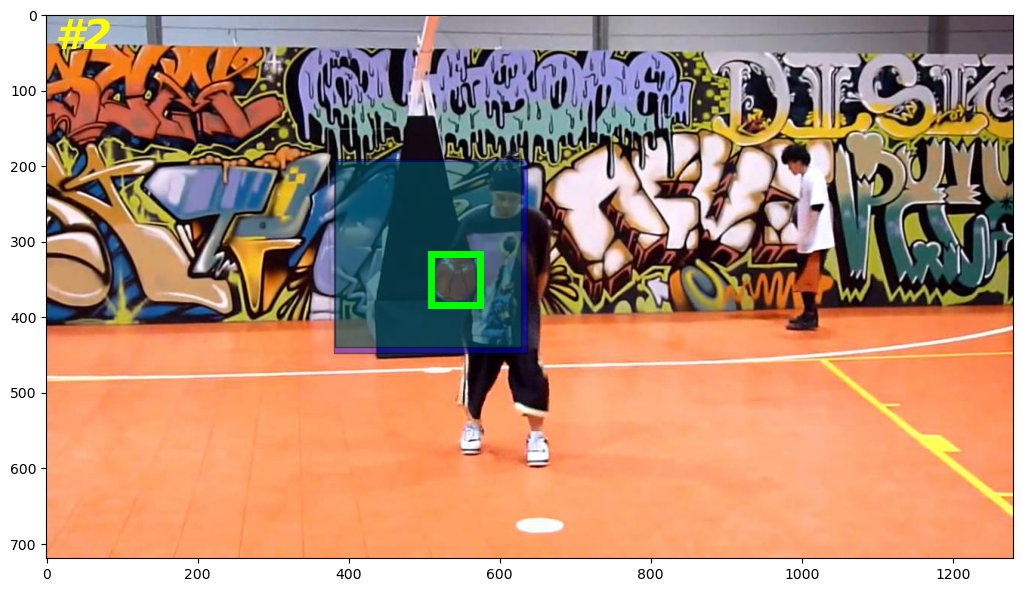

In [92]:

#读取图片
img=matplotlib.image.imread(img_list[f])
print(img_list[1003])
fig = plt.figure(figsize=(img.shape[1]/100, img.shape[0]/100), dpi=100)
plt.imshow(img)
currentAxis=plt.gca()

#绘制帧码
frame_label = '#' + str(f+1)
currentAxis.text(10, 30, frame_label, fontsize=30, color="yellow", style="italic", weight="black",
                verticalalignment='center',
                bbox=dict(facecolor=None, alpha=0.0))

#绘制搜索区域
rect_sr_T = plot_rect_sr(sr_T,'blue')
rect_sr_M = plot_rect_sr(sr_M,'green')
currentAxis.add_patch(rect_sr_T)
currentAxis.add_patch(rect_sr_M)

#绘制gt bbox
draw_gt = gt[f]
trans_draw_gt = draw_gt.copy()
xc = draw_gt[0] - draw_gt[2] / 2
yc = draw_gt[1] - draw_gt[3] / 2
trans_draw_gt[0] = xc
trans_draw_gt[1] = yc
print(trans_draw_gt)
leftupcorn = [draw_gt[0],draw_gt[1]]
rect_gt=patches.Rectangle(leftupcorn,trans_draw_gt[2],
                          trans_draw_gt[3],linewidth=5,
                          edgecolor='lime',facecolor='none')
currentAxis.add_patch(rect_gt)

out_path = './srview/' + seq_name + '/'

if not os.path.exists(out_path):
    os.mkdir(out_path)

f_out_path = out_path + str(f).zfill(8) + '.png'    
fig.savefig(f_out_path, dpi=100)